In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/akkar/Python FIles/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [3]:
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
df['Rating']=df['Rating'].astype(float)

In [5]:
df['Rating'].unique()

array([nan,  3.,  5.,  4.,  2.,  1.])

In [6]:
df['Rating'].value_counts()

4.0    8085741
3.0    6904181
5.0    5506583
2.0    2439073
1.0    1118186
Name: Rating, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [8]:
movie_counts=df.isnull().sum()[1]

In [9]:
movie_counts

4499

In [10]:
cust_counts=df['Cust_Id'].nunique()-movie_counts
cust_counts

470758

In [11]:
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [12]:
ratings_count=df['Cust_Id'].value_counts().sum()- movie_counts

In [13]:
ratings_count

24053764

In [14]:
Stars=df.groupby('Rating')['Rating'].agg(['count'])
Stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


Text(0.5, 1.0, 'Total pool: 4499 Movies, 470758 Customers, 24053764 Ratings given')

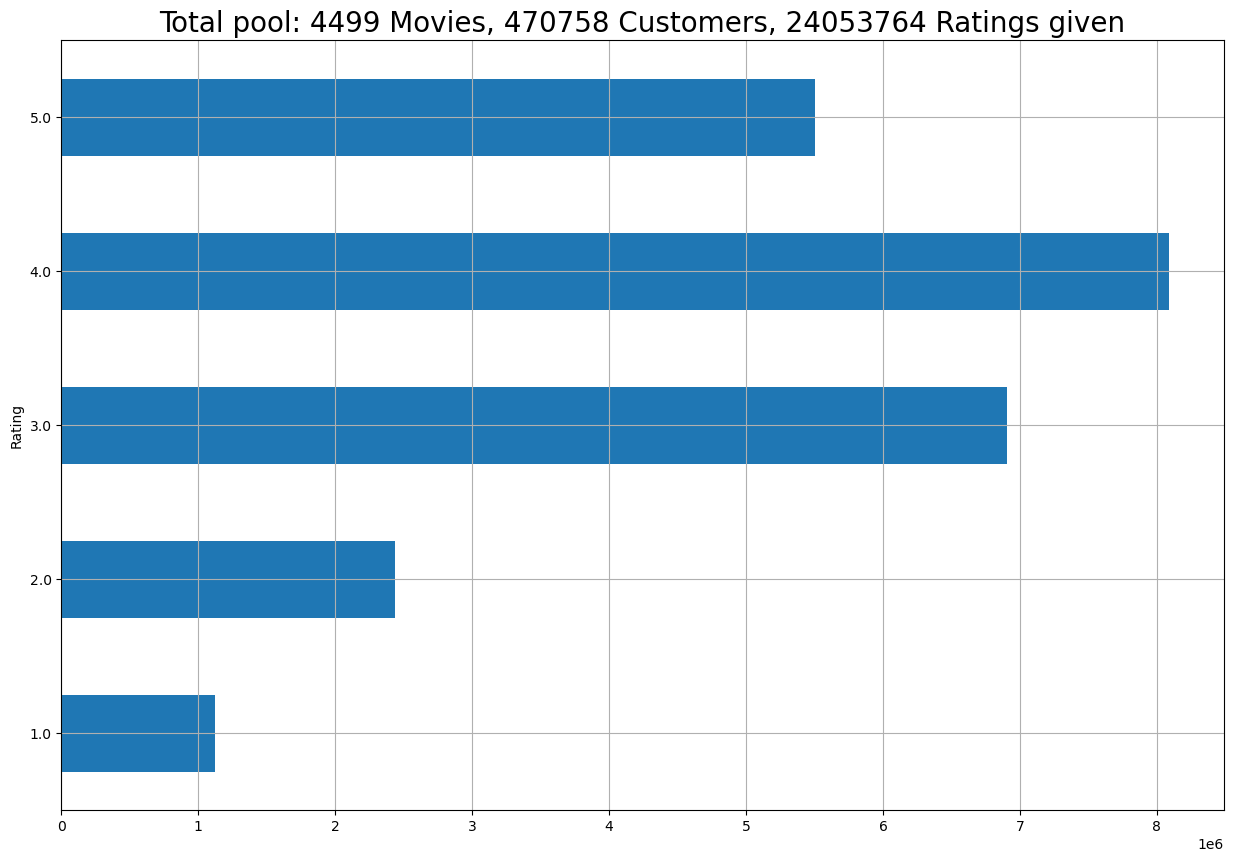

In [15]:
ax=Stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.grid(True)
plt.title(f'Total pool: {movie_counts} Movies, {cust_counts} Customers, {ratings_count} Ratings given', fontsize=20)


In [16]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))

df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [17]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [18]:
df_nan.shape

(4499, 1)

In [19]:
df_nan=df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [20]:
movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1


last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [21]:
df = df[pd.notnull(df['Rating'])]
df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('-Dataset examples-')
df.head()

C:\Users\akkar\AppData\Local\Temp\ipykernel_11896\2475081013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_Id'] = movie_np.astype(int)


-Dataset examples-


C:\Users\akkar\AppData\Local\Temp\ipykernel_11896\2475081013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cust_Id'] = df['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [22]:
df.shape

(24053764, 3)